# Can I Eat This Mushroom?
## An exploratory analysis on whether mushrooms are edible or poisonous
### Sakshi and Abbie
### March 9, 2022

### Introduction

This data was retrieved from the UCI Machine Learning repository. It details several characteristics about mushrooms and also classifies them by whether they are edible or poisonous. The data draws from The Audubon Society Field Guide to North American Mushrooms, published in 1981. We will also be referring to the provided "Codebook" from the UCI repository (also located in this repo), which defines the values of each variable (i.e. p = poisonous, and e = edible).

The goal of this project is to construct a model with high accuracy and recall, which can predict whether a mushroom is edible or poisonous. Before building models and prior to pre-processing, we will first conduct an exploratory analysis. This will provide insight into the overall trends of the data. 

### Set up and Initial Exploration

In [2]:
# load initial libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the 1987 original data set
mushroom = pd.read_csv('1987_data.csv')

# View the first few rows
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# View shape of data frame
mushroom.shape

(8124, 23)

The data frame above displays the 23 mushroom characteristics that we will be working with! The characteristics predominantly relate to the mushroom anatomy, the odor, the population, and natural habitat. Please see image below for a basic understanding of what each feature represents. 

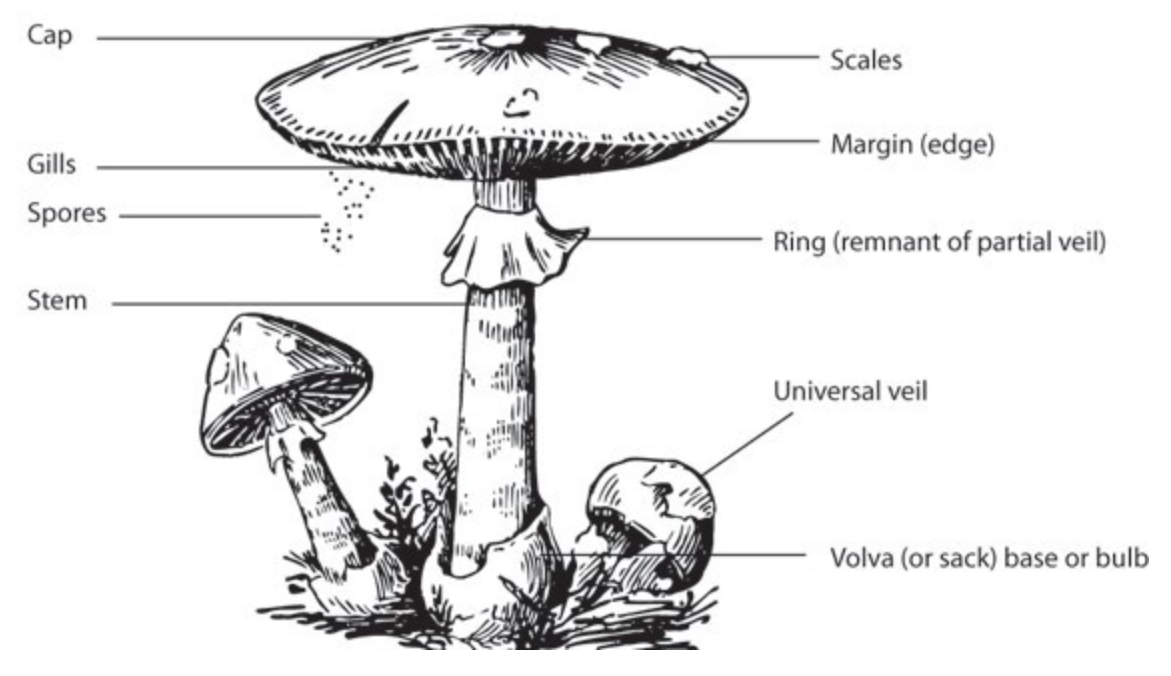

### Class Distribution

Because we will eventually build a classification model, we need to examine the distribution between classes. Are they equally represented? Or will we need to conduct resampling methods?

In [4]:
# There are precisely two class variables: poisonous and edible
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

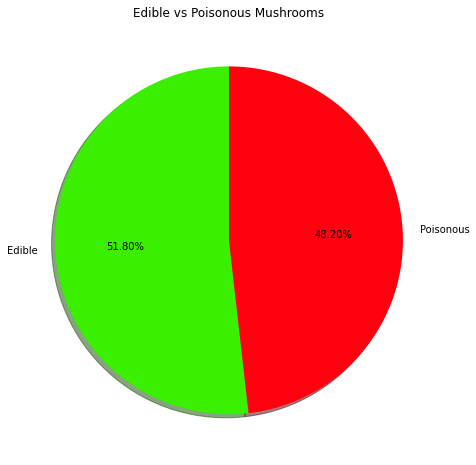

In [7]:
# checking mushroom class distribution across dataset
count = mushroom['class'].value_counts()
count.index = ["Edible","Poisonous"]

# Set up color and figure preferences
colors = sns.color_palette('prism')
plt.figure(figsize=(10,8))
plt.pie(count.values ,labels=count.index, startangle=90, shadow=True, autopct='%1.2f%%',  colors=colors)
plt.title('Edible vs Poisonous Mushrooms')
plt.show()

The above chart displays that approximately 52% of mushrooms in our data set are edible, and approximately 48% are poisonous. This distribution is already fairly equal, suggesting there is no need for resampling.

## Examining Other Features

The table below outlines the feature attributes that we will begin to explore (also referenced in codebook):

| | Column Name | Attribute Information |
| --- | --- | --- |
|1. | cap-shape | bell=b,   conical=c,   convex=x,    flat=f,    knobbed=k,   sunken=s |
|2. | cap-surface | fibrous=f, grooves=g, scaly=y,  smooth=s |
|3. | cap-color | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
|4. | bruises?| bruises=t, no=f |
|5. | odor | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
|6. | gill-attachment | attached=a, descending=d, free=f, notched=n |
|7. | gill-spacing | close=c, crowded=w, distant=d |
|8. | gill-size | broad=b, narrow=n |
|9. | gill-color | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
|10.| stalk-shape | enlarging=e, tapering=t |
|11.| stalk-root | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
|12.| stalk-surface-above-ring | fibrous=f, scaly=y, silky=k, smooth=s |
|13.| stalk-surface-below-ring | fibrous=f, scaly=y, silky=k, smooth=s |
|14.| stalk-color-above-ring | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
|15.| stalk-color-below-ring | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
|16.| veil-type | partial=p, universal=u |
|17.| veil-color | brown=n, orange=o, white=w, yellow=y |
|18.| ring-number | none=n, one=o, two=t |
|19.| ring-type | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
|20.| spore-print-color | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y |
|21.| population | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
|22.| habitat | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d |

In [8]:
# Describe the data
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [34]:
# Define function to list unique values per feature
def unique_vals(df):
    # Loop through variables in data frame
    for col in df.columns:
        # print unique variables
        print(f'{col}: {df[col].unique()}')

In [36]:
# List out the unique values per feature
unique_vals(mushroom)

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
# Display class types
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

We can quickly determine that all features are categorical, with several unique values per feature. Eventually, we will need to convert these features to numeric. 

The above output also suggests there are no missing values in this data set. However, when we examine more closely, we discover that the "stalk-root" has "?" listed as one the the unique values. The codebook confirms that this represents "missing."

In [32]:
# function to return the counts of specific values
def count_vals(df, column):
    import collections
    # convert column to array
    count_list = df[column].values
    # use the counter function to count the values
    frequencies = collections.Counter(count_list)
    # view frequencies
    print(frequencies)

In [33]:
# implement function 
count_vals(mushroom, 'stalk-root')

Counter({'b': 3776, '?': 2480, 'e': 1120, 'c': 556, 'r': 192})


The code above shows that there are 2,480 values missing within the "stalk-root" variable. This is a substantial proportion of our data (30.53% of mushrooms with a missing stalk-root value). During pre-processing, we will need to decide whether to remove this feature entirely or to replace the missing values. 

In [37]:
# Define function to examine overall distribution of variables in data frame
def pretty_vars(df, cols, rows):
    
    # necessary impots
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # convert column names to list for iterating 
    my_vars = df.columns.tolist()
    
    # set fig size
    fig = plt.figure(figsize=(25,25))
    
    # set up subplots
    for i, val in enumerate(my_vars):
        # create subplots with desired number of rows and cols
        ax = fig.add_subplot(rows, cols, i+1, title=val)
        
        # Extract the data
        sns.countplot(x=val, data=df)
        # Remove the x label
        ax.set(xlabel=" ")
        # edit layout
        fig.tight_layout(pad=1.0)

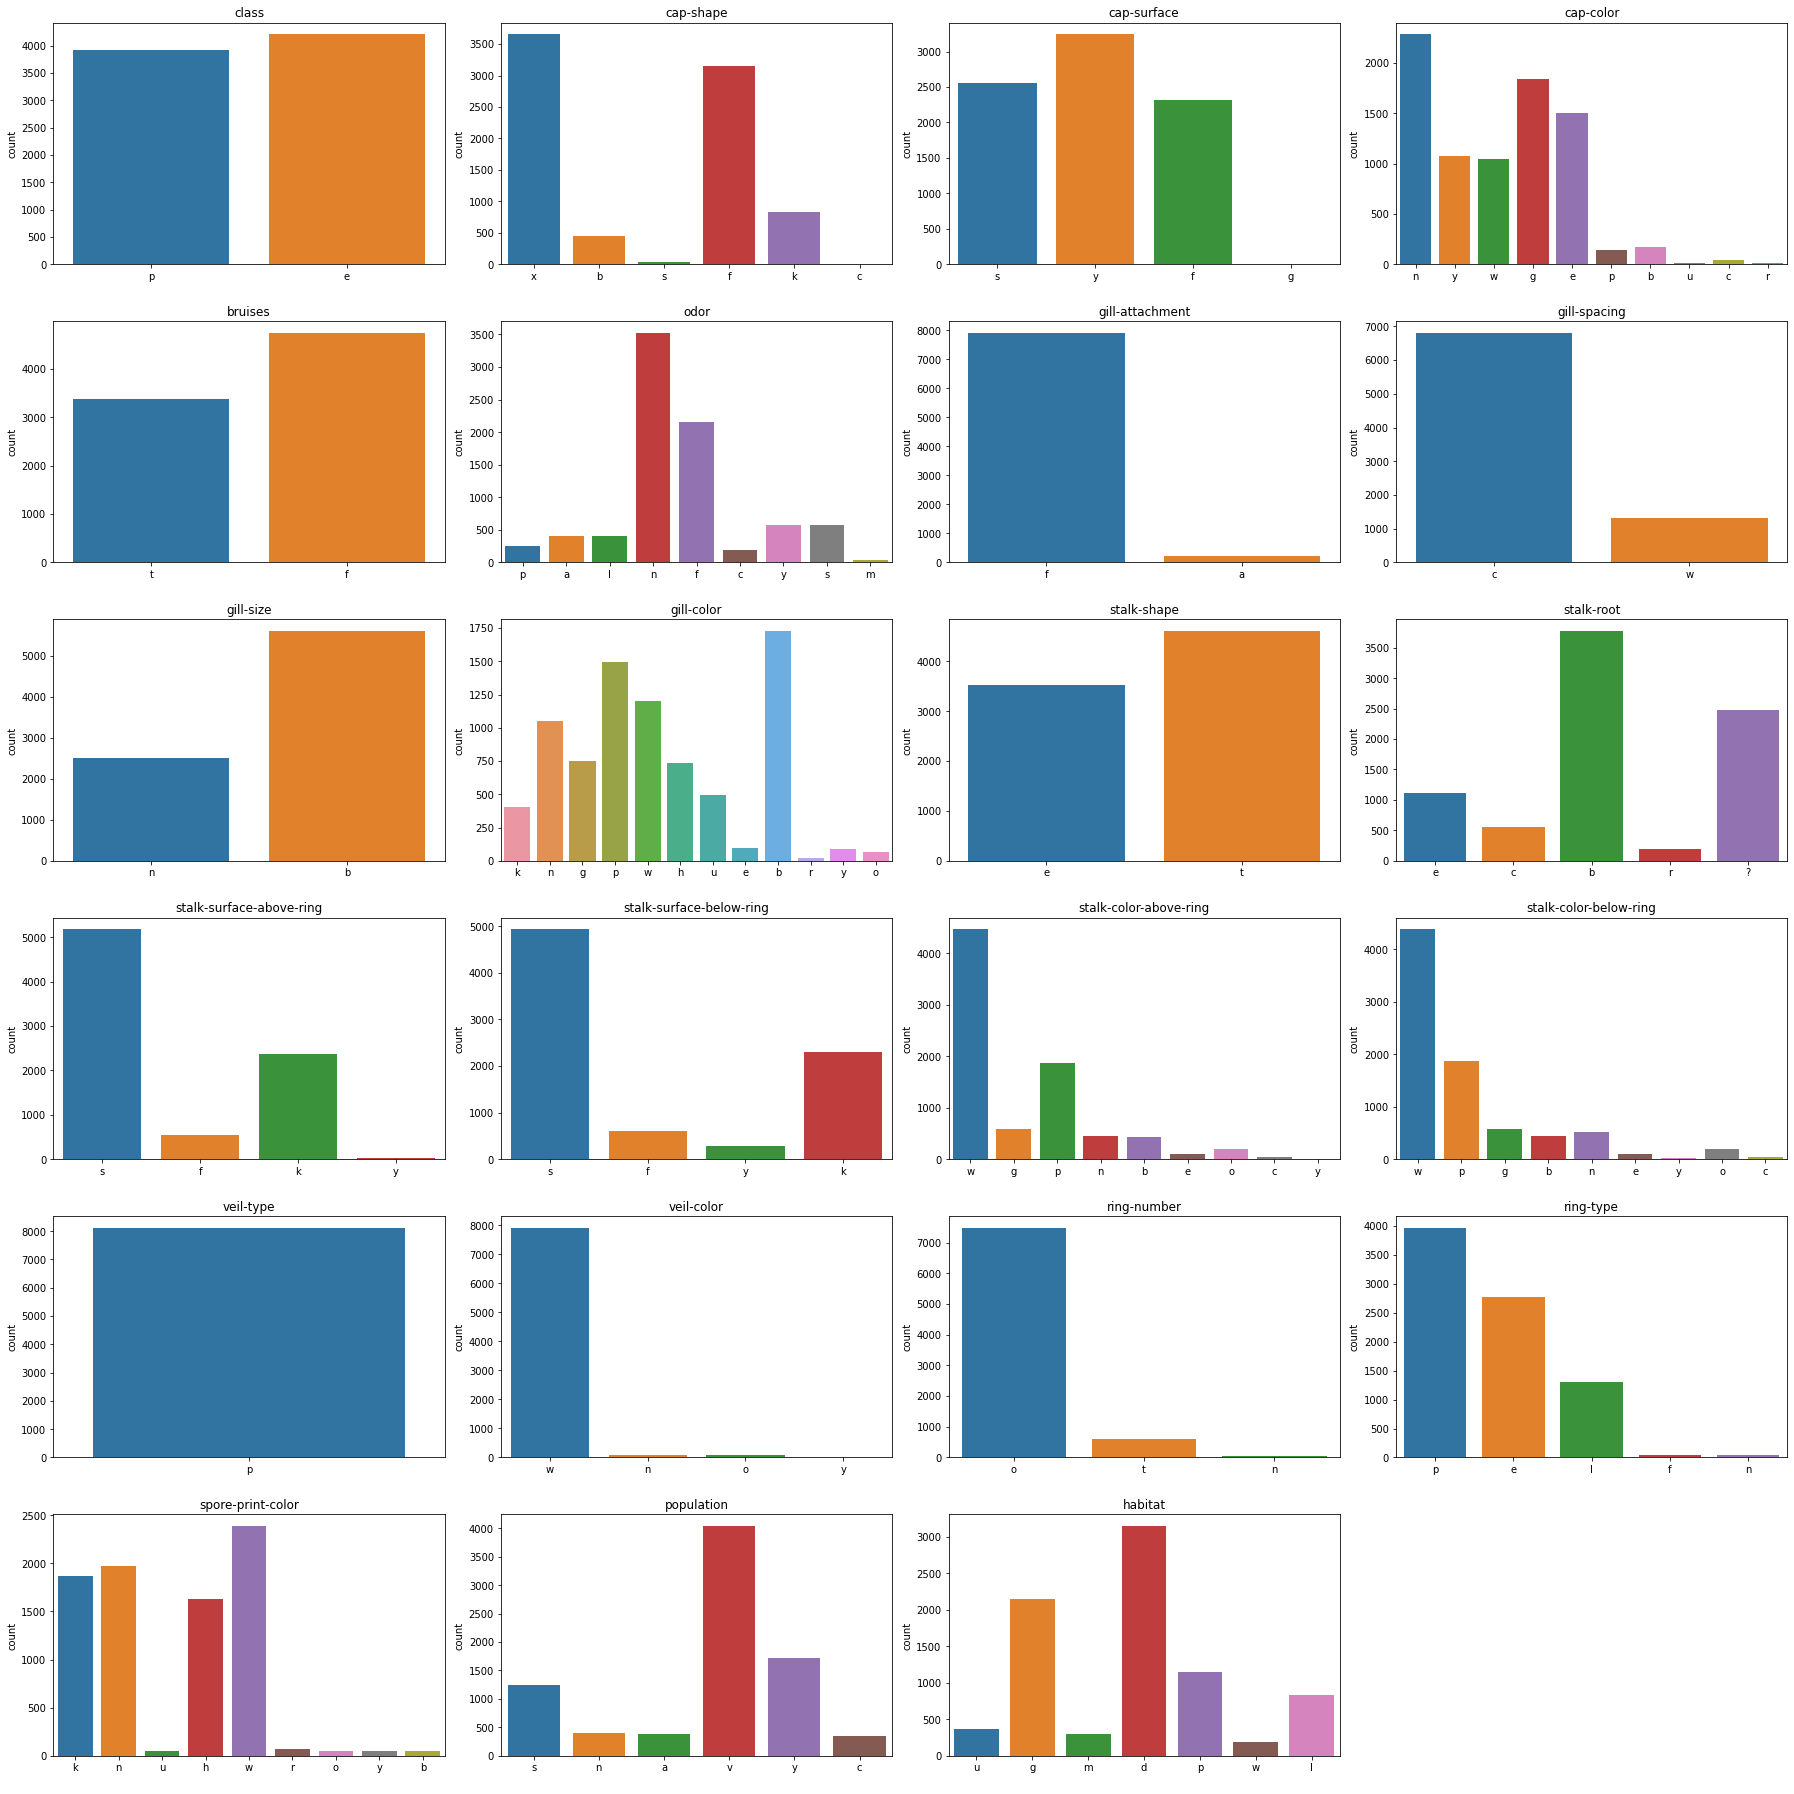

In [38]:
# Use function
pretty_vars(mushroom, 4, 6)

While the class distribution is fairly equal, the distribution of most other variables is not. Every veil-type is "partial" (as opposed to universal). Similarly, almost all veil colors are white, almost all gill attachments are "free," and the vast majority of mushrooms in this sample only have "one" ring. As such, those variables will likely not be as useful for our analysis.

Other variables, such as the mushroom habitat, the gill color, the cap color, and the cap surface might prove to be more informative. However, we will not know until we begin the analysis!